In [4]:
import re
import json
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from IPython.display import display
from statannot import add_stat_annotation

import seaborn as sns
from matplotlib import pyplot as plt

import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

In [5]:
df_d = pd.read_csv('./d_dark_patterns.csv')
df_h = pd.read_csv('./h_dark_patterns.csv')

In [6]:
df_d.drop(['Temporal Dark Patterns', 'Monetary Dark Patterns',
           'Social Dark Patterns', 'Psychological Dark Patterns'], axis=1, inplace=True)

df_h.drop(['Temporal Dark Patterns', 'Monetary Dark Patterns',
           'Social Dark Patterns', 'Psychological Dark Patterns'], axis=1, inplace=True)

df_d.drop(columns=["Unnamed: 0"], inplace=True)
df_h.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
csv_file_h = './df_h.csv'
csv_file_d = './df_d.csv'

# Speichern von df_h als CSV
df_h.to_csv(csv_file_h, index=False)

# Speichern von df_d als CSV
df_d.to_csv(csv_file_d, index=False)

In [8]:
from scipy.stats import shapiro
import pandas as pd

# Lese die Daten ein
df_h = pd.read_csv("df_h.csv")
df_d = pd.read_csv("df_d.csv")

# Wähle die relevanten Spalten für den Test aus
columns = ['Temporal Dark Patterns Present', 'Monetary Dark Patterns Present', 
           'Social Dark Patterns Present', 'Psychological Dark Patterns Present',
           'Temporal Dark Patterns Absence', 'Monetary Dark Patterns Absence',
           'Social Dark Patterns Absence', 'Psychological Dark Patterns Absence']

# Führe den Shapiro-Wilk-Test für jede Spalte durch
for column in columns:
    statistic, p_value = shapiro(df_h[column])
    print(f"Healthy - Variable: {column}")
    print(f"Shapiro-Wilk-Statistik: {statistic}")
    print(f"P-Wert: {p_value}")
    
    if p_value > 0.05:
        print("Die Daten könnten normalverteilt sein.")
    else:
        print("Die Daten sind wahrscheinlich nicht normalverteilt.")
        
    print("="*50)

for column in columns:
    statistic, p_value = shapiro(df_d[column])
    print(f"Dark - Variable: {column}")
    print(f"Shapiro-Wilk-Statistik: {statistic}")
    print(f"P-Wert: {p_value}")
    
    if p_value > 0.05:
        print("Die Daten könnten normalverteilt sein.")
    else:
        print("Die Daten sind wahrscheinlich nicht normalverteilt.")
        
    print("="*50)


Healthy - Variable: Temporal Dark Patterns Present
Shapiro-Wilk-Statistik: 0.18707937002182007
P-Wert: 0.0
Die Daten sind wahrscheinlich nicht normalverteilt.
Healthy - Variable: Monetary Dark Patterns Present
Shapiro-Wilk-Statistik: 0.1634877324104309
P-Wert: 0.0
Die Daten sind wahrscheinlich nicht normalverteilt.
Healthy - Variable: Social Dark Patterns Present
Shapiro-Wilk-Statistik: 0.12320685386657715
P-Wert: 0.0
Die Daten sind wahrscheinlich nicht normalverteilt.
Healthy - Variable: Psychological Dark Patterns Present
Shapiro-Wilk-Statistik: 0.20205092430114746
P-Wert: 0.0
Die Daten sind wahrscheinlich nicht normalverteilt.
Healthy - Variable: Temporal Dark Patterns Absence
Shapiro-Wilk-Statistik: 0.2668493390083313
P-Wert: 9.80908925027372e-45
Die Daten sind wahrscheinlich nicht normalverteilt.
Healthy - Variable: Monetary Dark Patterns Absence
Shapiro-Wilk-Statistik: 0.26226335763931274
P-Wert: 8.407790785948902e-45
Die Daten sind wahrscheinlich nicht normalverteilt.
Healthy - 

In [9]:
from scipy.stats import kruskal
import pandas as pd

# Lese die Daten ein
df_h = pd.read_csv("df_h.csv")
df_d = pd.read_csv("df_d.csv")

# Wähle die relevanten Spalten für den Test aus
columns = ['Temporal Dark Patterns Present', 'Monetary Dark Patterns Present', 
           'Social Dark Patterns Present', 'Psychological Dark Patterns Present',
           'Temporal Dark Patterns Absence', 'Monetary Dark Patterns Absence',
           'Social Dark Patterns Absence', 'Psychological Dark Patterns Absence']

# Führe den Kruskal-Wallis-Test für jede Spalte durch
for column in columns:
    statistic, p_value = kruskal(df_h[column], df_d[column])
    print(f"Variable: {column}")
    print(f"Kruskal-Wallis-Statistik: {statistic}")
    print(f"P-Wert: {p_value}")
    print("")

    if p_value < 0.05:
        print("Signifikante Unterschiede gefunden.")
    else:
        print("Keine signifikanten Unterschiede gefunden.")

    print("="*50)


Variable: Temporal Dark Patterns Present
Kruskal-Wallis-Statistik: 677.6572483080313
P-Wert: 2.1597063614373998e-149

Signifikante Unterschiede gefunden.
Variable: Monetary Dark Patterns Present
Kruskal-Wallis-Statistik: 818.197820759994
P-Wert: 5.964614634682791e-180

Signifikante Unterschiede gefunden.
Variable: Social Dark Patterns Present
Kruskal-Wallis-Statistik: 592.2468520630612
P-Wert: 8.131835101302225e-131

Signifikante Unterschiede gefunden.
Variable: Psychological Dark Patterns Present
Kruskal-Wallis-Statistik: 518.8420596876548
P-Wert: 7.559057920077262e-115

Signifikante Unterschiede gefunden.
Variable: Temporal Dark Patterns Absence
Kruskal-Wallis-Statistik: 186.20483984539976
P-Wert: 2.1417832694970106e-42

Signifikante Unterschiede gefunden.
Variable: Monetary Dark Patterns Absence
Kruskal-Wallis-Statistik: 211.7739107166313
P-Wert: 5.634512323338015e-48

Signifikante Unterschiede gefunden.
Variable: Social Dark Patterns Absence
Kruskal-Wallis-Statistik: 85.37032058179

In [10]:
u_stat, p_value = mannwhitneyu(df_d, df_h)

In [11]:
print("U-Statistic: ",u_stat)
print("p-value: ",p_value)

U-Statistic:  [488691.5 508685.5 465948.  462729.5 162732.  155223.  199664.5 179560. ]
p-value:  [2.16314240e-149 5.97508915e-180 8.14449292e-131 7.56954437e-115
 2.14356580e-042 5.63950895e-048 2.47547740e-020 5.03350198e-031]


In [12]:
t_stat, p_value = ttest_ind(df_d, df_h)

In [13]:
print("t-Statistic: ",t_stat)
print("p-value: ",p_value)

t-Statistic:  [ 6.05870571  6.90208537  5.72866834  5.51891249 -4.17327752 -4.02281079
 -3.13520109 -4.45103587]
p-value:  [1.73373336e-09 7.54929023e-12 1.22201443e-08 4.01540335e-08
 3.17557619e-05 6.03828175e-05 1.75080780e-03 9.17977410e-06]


In [14]:
df_d

,Temporal Dark Patterns Present,Monetary Dark Patterns Present,Social Dark Patterns Present,Psychological Dark Patterns Present,Temporal Dark Patterns Absence,Monetary Dark Patterns Absence,Social Dark Patterns Absence,Psychological Dark Patterns Absence
0,7,11,7,7,0,0,0,0
1,27,44,26,28,1,0,2,0
2,12,19,11,10,0,0,1,0
3,7,8,5,4,0,0,0,0
4,22,33,21,21,0,0,0,0
...,...,...,...,...,...,...,...,...
838,11,3,0,7,7,21,14,8
839,45,40,3,35,53,108,94,57
840,4,4,4,4,0,5,3,3
841,0,0,0,0,7,11,7,7


In [15]:
df_h

,Temporal Dark Patterns Present,Monetary Dark Patterns Present,Social Dark Patterns Present,Psychological Dark Patterns Present,Temporal Dark Patterns Absence,Monetary Dark Patterns Absence,Social Dark Patterns Absence,Psychological Dark Patterns Absence
0,0,0,0,0,21,33,21,21
1,0,0,0,0,14,22,14,14
2,0,0,0,0,14,22,14,11
3,0,0,0,0,7,11,7,6
4,0,0,0,0,7,11,7,6
...,...,...,...,...,...,...,...,...
648,24,39,0,17,43,63,63,49
649,12,14,0,6,15,28,28,20
650,0,2,1,0,0,0,0,0
651,0,0,0,0,7,11,7,7


In [16]:
df_h.shape

(653, 8)

In [17]:
df_d.shape

(843, 8)

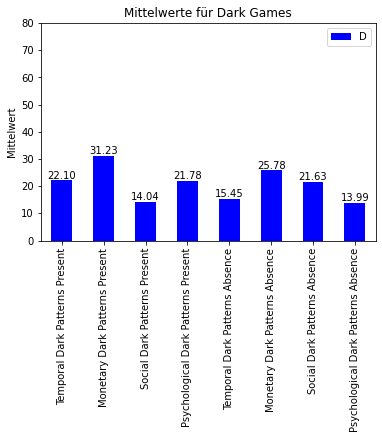

In [18]:
mean_values = df_d.mean()

mean_values.plot(kind='bar', rot=45, color='b', ylim=(0, 80))

# Zahlen über den Balken anzeigen
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f"{p.get_height():.2f}", ha='center', va='bottom')

plt.xlabel('')
plt.ylabel('Mittelwert')
plt.title('Mittelwerte für Dark Games')
plt.legend("D")

plt.xticks(rotation='vertical')

plt.show()


In [19]:
std_values = df_d.std(numeric_only=True)

print("Standardabweichungen:")
print(std_values)

Standardabweichungen:
Temporal Dark Patterns Present         69.664053
Monetary Dark Patterns Present         97.667081
Social Dark Patterns Present           55.100467
Psychological Dark Patterns Present    74.925200
Temporal Dark Patterns Absence         51.960278
Monetary Dark Patterns Absence         88.015799
Social Dark Patterns Absence           70.960324
Psychological Dark Patterns Absence    43.876053
dtype: float64


In [20]:
mean_values = df_d.mean(numeric_only=True)

print("Mittelwert:")
print(mean_values)

Mittelwert:
Temporal Dark Patterns Present         22.099644
Monetary Dark Patterns Present         31.233689
Social Dark Patterns Present           14.039146
Psychological Dark Patterns Present    21.778173
Temporal Dark Patterns Absence         15.454330
Monetary Dark Patterns Absence         25.778173
Social Dark Patterns Absence           21.634638
Psychological Dark Patterns Absence    13.991696
dtype: float64


In [21]:
df_h.shape

(653, 8)

In [22]:
std_values = df_h.std(numeric_only=True)

print("Standardabweichungen:")
print(std_values)

Standardabweichungen:
Temporal Dark Patterns Present          23.818759
Monetary Dark Patterns Present          23.665851
Social Dark Patterns Present            10.414646
Psychological Dark Patterns Present     22.340008
Temporal Dark Patterns Absence         109.909031
Monetary Dark Patterns Absence         177.539765
Social Dark Patterns Absence           120.103635
Psychological Dark Patterns Absence    104.883817
dtype: float64


In [23]:
mean_values = df_h.mean(numeric_only=True)

print("Mittelwert:")
print(mean_values)

Mittelwert:
Temporal Dark Patterns Present          4.849923
Monetary Dark Patterns Present          4.258806
Social Dark Patterns Present            1.516080
Psychological Dark Patterns Present     5.047473
Temporal Dark Patterns Absence         33.385911
Monetary Dark Patterns Absence         54.009188
Social Dark Patterns Absence           37.254211
Psychological Dark Patterns Absence    31.793262
dtype: float64


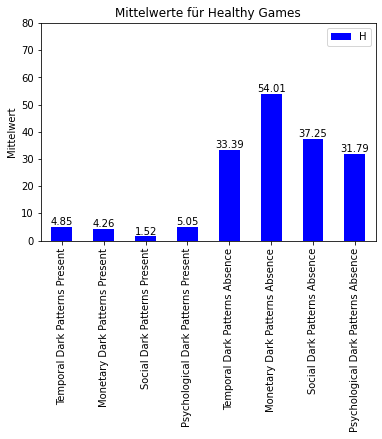

In [24]:
mean_values = df_h.mean()

mean_values.plot(kind='bar', rot=45, color='b', ylim=(0, 80))

# Zahlen über den Balken anzeigen
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f"{p.get_height():.2f}", ha='center', va='bottom')

plt.xlabel('')
plt.ylabel('Mittelwert')
plt.title('Mittelwerte für Healthy Games')
plt.legend("H")

plt.xticks(rotation='vertical')

plt.show()

In [25]:
dark_df = pd.read_csv('./d_dark_patterns.csv')
healthy_df = pd.read_csv('./h_dark_patterns.csv')

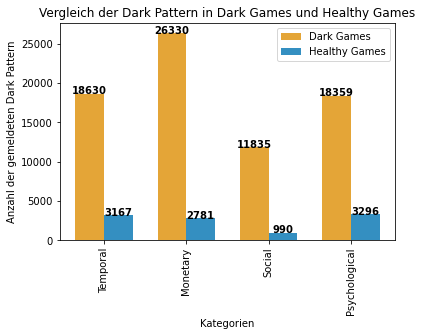

In [65]:
dark_sums = dark_df[['Temporal Dark Patterns Present', 'Monetary Dark Patterns Present', 'Social Dark Patterns Present', 'Psychological Dark Patterns Present']].sum()
healthy_sums = healthy_df[['Temporal Dark Patterns Present', 'Monetary Dark Patterns Present', 'Social Dark Patterns Present', 'Psychological Dark Patterns Present']].sum()

patterns = ['Temporal', 'Monetary', 'Social', 'Psychological']
bar_width = 0.35
opacity = 0.8

# Farbpalette für Farbenblinde
color_palette = sns.color_palette("colorblind")

fig, ax = plt.subplots()

dark_bars = ax.bar(np.arange(len(patterns)), dark_sums, bar_width, alpha=opacity, color=color_palette[1], label='Dark Games')
healthy_bars = ax.bar(np.arange(len(patterns)) + bar_width, healthy_sums, bar_width, alpha=opacity, color=color_palette[0], label='Healthy Games')

ax.set_xlabel('Kategorien')
ax.set_ylabel('Anzahl der gemeldeten Dark Pattern')
ax.set_title('Vergleich der Dark Pattern in Dark Games und Healthy Games')
ax.legend()

for i, v in enumerate(dark_sums):
    ax.text(i, v + 1, str(v), ha='center', color='black', fontweight='bold')
for i, v in enumerate(healthy_sums):
    ax.text(i + bar_width, v + 1, str(v), ha='center', color='black', fontweight='bold')

ax.set_xticks(np.arange(len(patterns)) + bar_width / 2)
ax.set_xticklabels(patterns)
plt.xticks(rotation=90) 

plt.show()

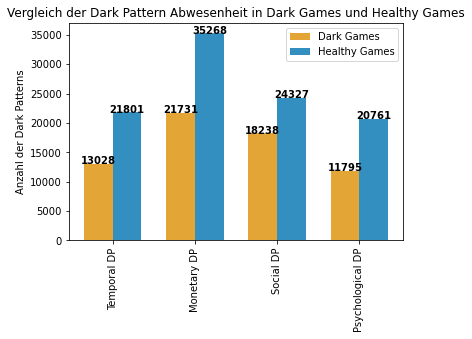

In [31]:
dark_sums = dark_df[['Temporal Dark Patterns Absence', 'Monetary Dark Patterns Absence', 'Social Dark Patterns Absence', 'Psychological Dark Patterns Absence']].sum()
healthy_sums = healthy_df[['Temporal Dark Patterns Absence', 'Monetary Dark Patterns Absence', 'Social Dark Patterns Absence', 'Psychological Dark Patterns Absence']].sum()

patterns = ['Temporal DP', 'Monetary DP', 'Social DP', 'Psychological DP']
bar_width = 0.35
opacity = 0.8

# Farbpalette für Farbenblinde
color_palette = sns.color_palette("colorblind")

fig, ax = plt.subplots()

dark_bars = ax.bar(np.arange(len(patterns)), dark_sums, bar_width, alpha=opacity, color=color_palette[1], label='Dark Games')
healthy_bars = ax.bar(np.arange(len(patterns)) + bar_width, healthy_sums, bar_width, alpha=opacity, color=color_palette[0], label='Healthy Games')


ax.set_ylabel('Anzahl der Dark Patterns')
ax.set_title('Vergleich der Dark Pattern Abwesenheit in Dark Games und Healthy Games')
ax.legend()

for i, v in enumerate(dark_sums):
    ax.text(i, v + 1, str(v), ha='center', color='black', fontweight='bold')
for i, v in enumerate(healthy_sums):
    ax.text(i + bar_width, v + 1, str(v), ha='center', color='black', fontweight='bold')

ax.set_xticks(np.arange(len(patterns)) + bar_width / 2)
ax.set_xticklabels(patterns)
plt.xticks(rotation=90)  

plt.savefig('VergleichPatternAbsence.pdf', format='pdf', bbox_inches='tight')

In [32]:
df_dr = pd.read_json('drating_cleaned.json')
df_hr = pd.read_json('hrating_cleaned.json')

In [33]:
df_dr = df_dr.dropna()
df_dr_filtered = df_dr[(df_dr['Temporal Dark Patterns'].apply(lambda x: int(re.search(r'\d+', str(x)).group())) > 1)
                      & (df_dr['Monetary Dark Patterns'].apply(lambda x: int(re.search(r'\d+', str(x)).group())) > 1)
                      & (df_dr['Social Dark Patterns'].apply(lambda x: int(re.search(r'\d+', str(x)).group())) > 1)
                      & (df_dr['Psychological Dark Patterns'].apply(lambda x: int(re.search(r'\d+', str(x)).group())) > 1)]

df_hr = df_hr.dropna()
df_hr_filtered = df_hr[(df_hr['Temporal Dark Patterns'].apply(lambda x: int(re.search(r'\d+', str(x)).group())) > 1)
                      & (df_hr['Monetary Dark Patterns'].apply(lambda x: int(re.search(r'\d+', str(x)).group())) > 1)
                      & (df_hr['Social Dark Patterns'].apply(lambda x: int(re.search(r'\d+', str(x)).group())) > 1)
                      & (df_hr['Psychological Dark Patterns'].apply(lambda x: int(re.search(r'\d+', str(x)).group())) > 1)]


In [34]:
df_dr['Price'] = df_dr['Price'].apply(lambda x: 'Not Free' if x != 'Free' else 'Free')
df_hr['Price'] = df_hr['Price'].apply(lambda x: 'Not Free' if x != 'Free' else 'Free')

In [35]:
df_dr['In App Purchases'] = df_dr['In App Purchases'].fillna('Unknown')
df_hr['In App Purchases'] = df_hr['In App Purchases'].fillna('Unknown')

In [36]:
df_dr['Ads'] = df_dr['Ads'].fillna('Unknown')
df_hr['Ads'] = df_hr['Ads'].fillna('Unknown')

In [37]:
df_dr_counts = pd.value_counts(df_dr['Price'], normalize=False)

df_hr_counts = pd.value_counts(df_hr['Price'], normalize=False)

print("Anzahl der Preise in Dark Games:")
print(df_dr_counts)

print("\nAnzahl der Preise in Healthy Games:")
print(df_hr_counts)

Anzahl der Preise in Dark Games:
Free        816
Not Free     27
Name: Price, dtype: int64

Anzahl der Preise in Healthy Games:
Free        345
Not Free    307
Name: Price, dtype: int64


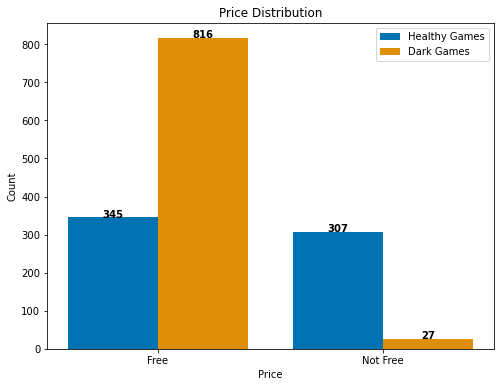

In [38]:
# Farbpalette für Farbenblinde
color_palette = sns.color_palette("colorblind")

df_dr_counts = pd.value_counts(df_dr['Price'], normalize=False)
df_hr_counts = pd.value_counts(df_hr['Price'], normalize=False)

fig, ax = plt.subplots(figsize=(8, 6))

positions = np.arange(len(df_dr_counts))

bar_width = 0.4

ax.bar(positions, df_hr_counts, bar_width, color=color_palette[0], label='Healthy Games')
ax.bar(positions + bar_width, df_dr_counts, bar_width, color=color_palette[1], label='Dark Games')

ax.set_ylabel('Count')
ax.set_xlabel('Price')
ax.set_title('Price Distribution')
ax.legend()

ax.set_xticks(positions + bar_width / 2)
ax.set_xticklabels(df_dr_counts.index)

# Textbeschriftungen hinzufügen
for i, v in enumerate(df_hr_counts):
    ax.text(i, v + 1, str(v), color='black', fontweight='bold', ha='center')
for i, v in enumerate(df_dr_counts):
    ax.text(i + bar_width, v + 1, str(v), color='black', fontweight='bold', ha='center')
    
plt.savefig('VergleichPrice.pdf', format='pdf')

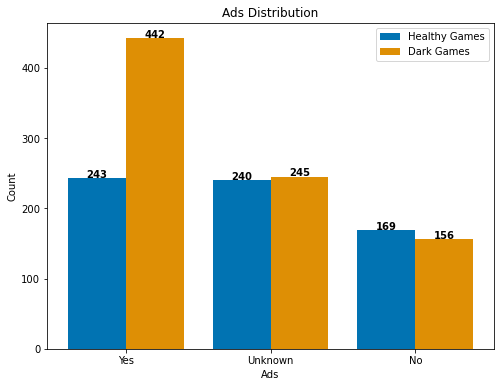

In [39]:
df_dr_counts = pd.value_counts(df_dr['Ads'], normalize=False)
df_hr_counts = pd.value_counts(df_hr['Ads'], normalize=False)

fig, ax = plt.subplots(figsize=(8, 6))

positions = np.arange(len(df_dr_counts))

bar_width = 0.4

# Farbpalette für Farbenblinde
color_palette = sns.color_palette("colorblind")

ax.bar(positions, df_hr_counts, bar_width, color=color_palette[0], label='Healthy Games')
ax.bar(positions + bar_width, df_dr_counts, bar_width, color=color_palette[1], label='Dark Games')

ax.set_ylabel('Count')
ax.set_xlabel('Ads')
ax.set_title('Ads Distribution')
ax.legend()

ax.set_xticks(positions + bar_width / 2)
ax.set_xticklabels(df_dr_counts.index)

# Textbeschriftungen hinzufügen
for i, v in enumerate(df_hr_counts):
    ax.text(i, v + 1, str(v), color='black', fontweight='bold', ha='center')
for i, v in enumerate(df_dr_counts):
    ax.text(i + bar_width, v + 1, str(v), color='black', fontweight='bold', ha='center')

plt.savefig('VergleichAds.pdf', format='pdf')

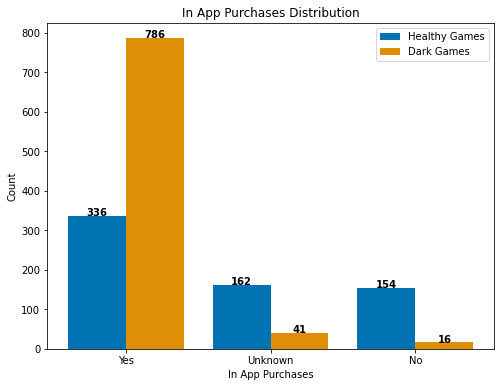

In [40]:
df_dr_counts = pd.value_counts(df_dr['In App Purchases'], normalize=False)
df_hr_counts = pd.value_counts(df_hr['In App Purchases'], normalize=False)

fig, ax = plt.subplots(figsize=(8, 6))

positions = np.arange(len(df_dr_counts))

bar_width = 0.4

# Farbpalette für Farbenblinde
color_palette = sns.color_palette("colorblind")

ax.bar(positions, df_hr_counts, bar_width, color=color_palette[0], label='Healthy Games')
ax.bar(positions + bar_width, df_dr_counts, bar_width, color=color_palette[1], label='Dark Games')

ax.set_ylabel('Count')
ax.set_xlabel('In App Purchases')
ax.set_title('In App Purchases Distribution')
ax.legend()

ax.set_xticks(positions + bar_width / 2)
ax.set_xticklabels(df_dr_counts.index)

# Textbeschriftungen hinzufügen
for i, v in enumerate(df_hr_counts):
    ax.text(i, v + 1, str(v), color='black', fontweight='bold', ha='center')
for i, v in enumerate(df_dr_counts):
    ax.text(i + bar_width, v + 1, str(v), color='black', fontweight='bold', ha='center')

plt.savefig('VergleichInAppPurchases.pdf', format='pdf')

In [41]:
dark_kmeans = pd.read_csv('./d_dark_patterns.csv')
healthy_kmeans = pd.read_csv('./h_dark_patterns.csv')

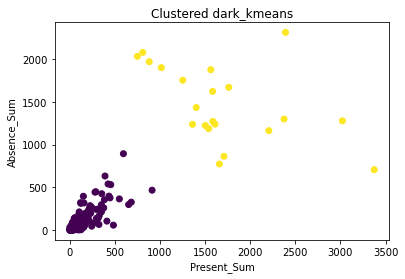

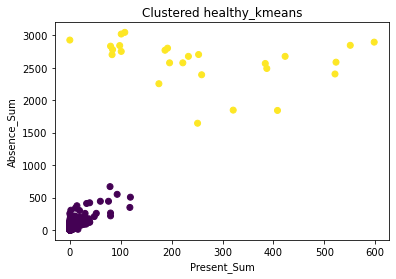

In [42]:
def apply_kmeans(df, k):
    df['Present_Sum'] = df[['Temporal Dark Patterns Present', 'Monetary Dark Patterns Present',
                            'Social Dark Patterns Present', 'Psychological Dark Patterns Present']].sum(axis=1)
    df['Absence_Sum'] = df[['Temporal Dark Patterns Absence', 'Monetary Dark Patterns Absence',
                            'Social Dark Patterns Absence', 'Psychological Dark Patterns Absence']].sum(axis=1)

    features = df[['Present_Sum', 'Absence_Sum']]

    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)

    df['Cluster'] = kmeans.labels_

    return df

k = 2

def save_cluster_plot(df, title, filename):
    plt.scatter(df['Present_Sum'], df['Absence_Sum'], c=df['Cluster'])
    plt.xlabel('Present_Sum')
    plt.ylabel('Absence_Sum')
    plt.title(title)
    plt.savefig(filename, format='svg')
    plt.close()

clustered_dark_kmeans = apply_kmeans(dark_kmeans, k)

clustered_healthy_kmeans = apply_kmeans(healthy_kmeans, k)

plt.scatter(clustered_dark_kmeans['Present_Sum'], clustered_dark_kmeans['Absence_Sum'], c=clustered_dark_kmeans['Cluster'])
plt.xlabel('Present_Sum')
plt.ylabel('Absence_Sum')
plt.title('Clustered dark_kmeans')
plt.show()

plt.scatter(clustered_healthy_kmeans['Present_Sum'], clustered_healthy_kmeans['Absence_Sum'], c=clustered_healthy_kmeans['Cluster'])
plt.xlabel('Present_Sum')
plt.ylabel('Absence_Sum')
plt.title('Clustered healthy_kmeans')
plt.show()

In [43]:
clustered_dark_kmeans = apply_kmeans(dark_kmeans, k)
save_cluster_plot(clustered_dark_kmeans, 'Clustered dark_kmeans', 'clustered_dark_kmeans.svg')

clustered_healthy_kmeans = apply_kmeans(healthy_kmeans, k)
save_cluster_plot(clustered_healthy_kmeans, 'Clustered healthy_kmeans', 'clustered_healthy_kmeans.svg')


Total Absence: 166949
Total Presence: 85388


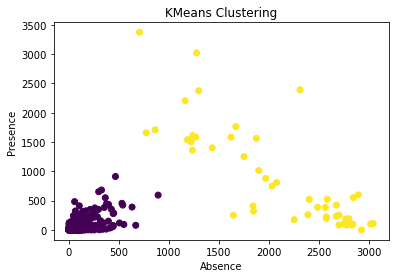

In [44]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lade die beiden Datensätze
df_h = pd.read_csv("h_dark_patterns.csv")
df_d = pd.read_csv("d_dark_patterns.csv")

# Füge eine Spalte hinzu, um die Datensätze zu kennzeichnen (0 für h_dark_patterns, 1 für d_dark_patterns)
df_h['Dataset'] = 0
df_d['Dataset'] = 1

# Kombiniere beide Datensätze
df_combined = pd.concat([df_h, df_d], ignore_index=True)

# Fasse die "Absence"-Spalten zusammen
df_combined['Absence'] = df_combined['Temporal Dark Patterns Absence'] + df_combined['Monetary Dark Patterns Absence'] + df_combined['Social Dark Patterns Absence'] + df_combined['Psychological Dark Patterns Absence']

# Fasse die "Presence"-Spalten zusammen
df_combined['Presence'] = df_combined['Temporal Dark Patterns Present'] + df_combined['Monetary Dark Patterns Present'] + df_combined['Social Dark Patterns Present'] + df_combined['Psychological Dark Patterns Present']

# Berechne die Summe von "Absence" und "Presence"
total_absence = df_combined['Absence'].sum()
total_presence = df_combined['Presence'].sum()

# Drucke die Gesamtzahl von "Absence" und "Presence"
print("Total Absence:", total_absence)
print("Total Presence:", total_presence)

# Führe die KMeans-Clusteranalyse durch
X = df_combined[['Absence', 'Presence']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Weise jedem Datenpunkt ein Cluster zu
labels = kmeans.labels_

# Visualisiere die Clusterergebnisse
plt.scatter(X['Absence'], X['Presence'], c=labels)
plt.xlabel('Absence')
plt.ylabel('Presence')
plt.title('KMeans Clustering')

plt.savefig('cluster_plot.svg', format='svg')

plt.show()



In [45]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(X, labels)
print("Silhouette Score:", silhouette)


Silhouette Score: 0.9525140955099269


In [46]:
# Führe die KMeans-Clusteranalyse durch
X = df_combined[['Temporal Dark Patterns Absence', 'Monetary Dark Patterns Absence', 'Social Dark Patterns Absence', 'Psychological Dark Patterns Absence',
                 'Temporal Dark Patterns Present', 'Monetary Dark Patterns Present', 'Social Dark Patterns Present', 'Psychological Dark Patterns Present']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Weise jedem Datenpunkt ein Cluster zu
labels = kmeans.labels_

# Berechne die Inertia
inertia = kmeans.inertia_
print("Inertia:", inertia)


Inertia: 22070258.361540575


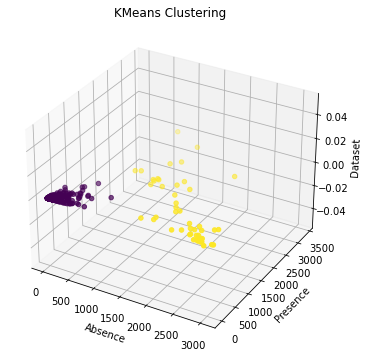

In [47]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Lade die beiden Datensätze
df_h = pd.read_csv("h_dark_patterns.csv")
df_d = pd.read_csv("d_dark_patterns.csv")

# Füge eine Spalte hinzu, um die Datensätze zu kennzeichnen (0 für h_dark_patterns, 1 für d_dark_patterns)
df_h['Dataset'] = 0
df_d['Dataset'] = 1

# Kombiniere beide Datensätze
df_combined = pd.concat([df_h, df_d], ignore_index=True)

# Fasse die "Absence"-Spalten zusammen
df_combined['Absence'] = df_combined['Temporal Dark Patterns Absence'] + df_combined['Monetary Dark Patterns Absence'] + df_combined['Social Dark Patterns Absence'] + df_combined['Psychological Dark Patterns Absence']

# Fasse die "Presence"-Spalten zusammen
df_combined['Presence'] = df_combined['Temporal Dark Patterns Present'] + df_combined['Monetary Dark Patterns Present'] + df_combined['Social Dark Patterns Present'] + df_combined['Psychological Dark Patterns Present']

# Führe die KMeans-Clusteranalyse durch
X = df_combined[['Absence', 'Presence']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Weise jedem Datenpunkt ein Cluster zu
labels = kmeans.labels_

# Visualisiere die Clusterergebnisse als 3D-Scatterplot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Absence'], X['Presence'], c=labels)
ax.set_xlabel('Absence')
ax.set_ylabel('Presence')
ax.set_zlabel('Dataset')
ax.set_title('KMeans Clustering')

plt.show()


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Lade die beiden Datensätze
df_h = pd.read_csv("h_dark_patterns.csv")
df_d = pd.read_csv("d_dark_patterns.csv")

# Füge eine Spalte hinzu, um die Datensätze zu kennzeichnen (0 für h_dark_patterns, 1 für d_dark_patterns)
df_h['Label'] = 0
df_d['Label'] = 1

# Kombiniere beide Datensätze
df_combined = pd.concat([df_h, df_d], ignore_index=True)

# Definiere Features (X) und Labels (y)
X = df_combined[['Temporal Dark Patterns Absence', 'Monetary Dark Patterns Absence', 'Social Dark Patterns Absence', 'Psychological Dark Patterns Absence',
                 'Temporal Dark Patterns Present', 'Monetary Dark Patterns Present', 'Social Dark Patterns Present', 'Psychological Dark Patterns Present']]
y = df_combined['Label']

# Teile die Daten in Trainings- und Testsets auf
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstelle und trainiere das Klassifizierungsmodell (logistische Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Mache Vorhersagen für die Testdaten
y_pred = model.predict(X_test)

# Berechne die Genauigkeit der Vorhersagen
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9833333333333333


In [49]:
# Code 1
df_dr_counts_ads = pd.value_counts(df_dr['Ads'], normalize=False)
df_hr_counts_ads = pd.value_counts(df_hr['Ads'], normalize=False)

# Code 2
df_dr_counts_in_app = pd.value_counts(df_dr['In App Purchases'], normalize=False)
df_hr_counts_in_app = pd.value_counts(df_hr['In App Purchases'], normalize=False)

# Code 3
df_dr_counts_price = pd.value_counts(df_dr['Price'], normalize=False)
df_hr_counts_price = pd.value_counts(df_hr['Price'], normalize=False)

table_data = {
    'Ads': pd.concat([df_hr_counts_ads, df_dr_counts_ads], axis=1, keys=['Healthy Games', 'Dark Games']),
    'In App Purchases': pd.concat([df_hr_counts_in_app, df_dr_counts_in_app], axis=1, keys=['Healthy Games', 'Dark Games']),
    'Price': pd.concat([df_hr_counts_price, df_dr_counts_price], axis=1, keys=['Healthy Games', 'Dark Games'])
}

for column, data in table_data.items():
    display(pd.DataFrame(data, columns=['Healthy Games', 'Dark Games'], index=data.index).rename_axis(column))


,Healthy Games,Dark Games
Ads,,
Unknown,243,245
Yes,240,442
No,169,156


,Healthy Games,Dark Games
In App Purchases,,
Yes,336,786
Unknown,162,41
No,154,16


,Healthy Games,Dark Games
Price,,
Free,345,816
Not Free,307,27


In [50]:
# Annahme: df_dr und df_hr sind bereits vorhanden
# Transformationen für df_dr
df_dr['Price'] = df_dr['Price'].apply(lambda x: 'Not Free' if x != 'Free' else 'Free')
df_dr['In App Purchases'] = df_dr['In App Purchases'].fillna('Unknown')
df_dr['Ads'] = df_dr['Ads'].fillna('Unknown')

# Filtern der Zeilen basierend auf den Dark Patterns
df_dr = df_dr.dropna()

# Erstellen des df_d_info DataFrames
df_d_info = pd.DataFrame({
    'Price': df_dr['Price'],
    'In App Purchases': df_dr['In App Purchases'],
    'Ads': df_dr['Ads']
})

# Transformationen für df_hr
df_hr['Price'] = df_hr['Price'].apply(lambda x: 'Not Free' if x != 'Free' else 'Free')
df_hr['In App Purchases'] = df_hr['In App Purchases'].fillna('Unknown')
df_hr['Ads'] = df_hr['Ads'].fillna('Unknown')

# Filtern der Zeilen basierend auf den Dark Patterns
df_hr = df_hr.dropna()

# Erstellen des df_h_info DataFrames
df_h_info = pd.DataFrame({
    'Price': df_hr['Price'],
    'In App Purchases': df_hr['In App Purchases'],
    'Ads': df_hr['Ads']
})

# Anzeigen der DataFrames als Tabellen
print("DataFrame df_d_info:")
print(df_d_info)

print("\nDataFrame df_h_info:")
print(df_h_info)

DataFrame df_d_info:
          Price In App Purchases  Ads
1          Free              Yes  Yes
2          Free              Yes  Yes
3          Free              Yes  Yes
4          Free              Yes  Yes
5      Not Free          Unknown  Yes
...         ...              ...  ...
840        Free              Yes  Yes
841        Free              Yes  Yes
8805       Free              Yes   No
8896   Not Free               No   No
23621      Free              Yes  Yes

[843 rows x 3 columns]

DataFrame df_h_info:
          Price In App Purchases  Ads
0      Not Free              Yes   No
1      Not Free               No   No
2      Not Free               No   No
3      Not Free               No   No
4      Not Free               No   No
...         ...              ...  ...
649        Free              Yes  Yes
650        Free              Yes  Yes
4019       Free              Yes  Yes
18739  Not Free               No   No
18831      Free              Yes   No

[652 rows x 3 column

In [51]:
# Berechnung der Häufigkeiten
price_counts_dr = df_d_info['Price'].value_counts()
iap_counts_dr = df_d_info['In App Purchases'].value_counts()
ads_counts_dr = df_d_info['Ads'].value_counts()

# Berechnung der Prozentsätze
total_apps_dr = len(df_d_info)
price_percentages_dr = price_counts_dr / total_apps_dr * 100
iap_percentages_dr = iap_counts_dr / total_apps_dr * 100
ads_percentages_dr = ads_counts_dr / total_apps_dr * 100

# Anzeigen der Ergebnisse
print("Verteilung der Price-Eigenschaft in df_d_info:")
print(price_counts_dr)
print(price_percentages_dr)

print("\nVerteilung der In App Purchases-Eigenschaft in df_d_info:")
print(iap_counts_dr)
print(iap_percentages_dr)

print("\nVerteilung der Ads-Eigenschaft in df_d_info:")
print(ads_counts_dr)
print(ads_percentages_dr)


Verteilung der Price-Eigenschaft in df_d_info:
Free        816
Not Free     27
Name: Price, dtype: int64
Free        96.797153
Not Free     3.202847
Name: Price, dtype: float64

Verteilung der In App Purchases-Eigenschaft in df_d_info:
Yes        786
Unknown     41
No          16
Name: In App Purchases, dtype: int64
Yes        93.238434
Unknown     4.863582
No          1.897983
Name: In App Purchases, dtype: float64

Verteilung der Ads-Eigenschaft in df_d_info:
Yes        442
Unknown    245
No         156
Name: Ads, dtype: int64
Yes        52.431791
Unknown    29.062871
No         18.505338
Name: Ads, dtype: float64


In [52]:
# Berechnung der Häufigkeiten
price_counts_hr = df_h_info['Price'].value_counts()
iap_counts_hr = df_h_info['In App Purchases'].value_counts()
ads_counts_hr = df_h_info['Ads'].value_counts()

# Berechnung der Prozentsätze
total_apps_hr = len(df_h_info)
price_percentages_hr = price_counts_hr / total_apps_hr * 100
iap_percentages_hr = iap_counts_hr / total_apps_hr * 100
ads_percentages_hr = ads_counts_hr / total_apps_hr * 100

# Anzeigen der Ergebnisse
print("Verteilung der Price-Eigenschaft in df_h_info:")
print(price_counts_hr)
print(price_percentages_hr)

print("\nVerteilung der In App Purchases-Eigenschaft in df_h_info:")
print(iap_counts_hr)
print(iap_percentages_hr)

print("\nVerteilung der Ads-Eigenschaft in df_h_info:")
print(ads_counts_hr)
print(ads_percentages_hr)


Verteilung der Price-Eigenschaft in df_h_info:
Free        345
Not Free    307
Name: Price, dtype: int64
Free        52.91411
Not Free    47.08589
Name: Price, dtype: float64

Verteilung der In App Purchases-Eigenschaft in df_h_info:
Yes        336
Unknown    162
No         154
Name: In App Purchases, dtype: int64
Yes        51.533742
Unknown    24.846626
No         23.619632
Name: In App Purchases, dtype: float64

Verteilung der Ads-Eigenschaft in df_h_info:
Unknown    243
Yes        240
No         169
Name: Ads, dtype: int64
Unknown    37.269939
Yes        36.809816
No         25.920245
Name: Ads, dtype: float64


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Lese die Datensätze ein
df_h = pd.read_csv("df_h.csv")
df_d = pd.read_csv("df_d.csv")

# Füge eine Spalte hinzu, um zwischen den beiden Datensätzen zu unterscheiden
df_h['Label'] = 'Healthy'
df_d['Label'] = 'Dark'

# Kombiniere die Datensätze
df_combined = pd.concat([df_h, df_d], ignore_index=True)

# Aufteilung in Features (X) und Labels (y)
X = df_combined.drop('Label', axis=1)
y = df_combined['Label']

# Teile die Daten in Trainings- und Testsets auf
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisiere den linearen Klassifikator (Logistic Regression)
classifier = LogisticRegression()

# Trainiere den Klassifikator auf den Trainingsdaten
classifier.fit(X_train, y_train)

# Vorhersagen auf den Testdaten
y_pred = classifier.predict(X_test)

# Evaluieren des Klassifikators
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9833333333333333


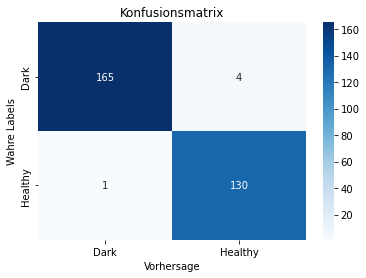

Accuracy: 0.9833333333333333


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Lese die Datensätze ein
df_h = pd.read_csv("df_h.csv")
df_d = pd.read_csv("df_d.csv")

# Füge eine Spalte hinzu, um zwischen den beiden Datensätzen zu unterscheiden
df_h['Label'] = 'Healthy'
df_d['Label'] = 'Dark'

# Kombiniere die Datensätze
df_combined = pd.concat([df_h, df_d], ignore_index=True)

# Aufteilung in Features (X) und Labels (y)
X = df_combined.drop('Label', axis=1)
y = df_combined['Label']

# Teile die Daten in Trainings- und Testsets auf
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisiere den linearen Klassifikator (Logistic Regression)
classifier = LogisticRegression()

# Trainiere den Klassifikator auf den Trainingsdaten
classifier.fit(X_train, y_train)

# Vorhersagen auf den Testdaten
y_pred = classifier.predict(X_test)

# Erstelle eine Konfusionsmatrix
confusion = confusion_matrix(y_test, y_pred)

# Visualisiere die Konfusionsmatrix als Heatmap
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Dark', 'Healthy'], yticklabels=['Dark', 'Healthy'])
plt.xlabel('Vorhersage')
plt.ylabel('Wahre Labels')
plt.title('Konfusionsmatrix')
plt.show()

# Evaluieren des Klassifikators
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


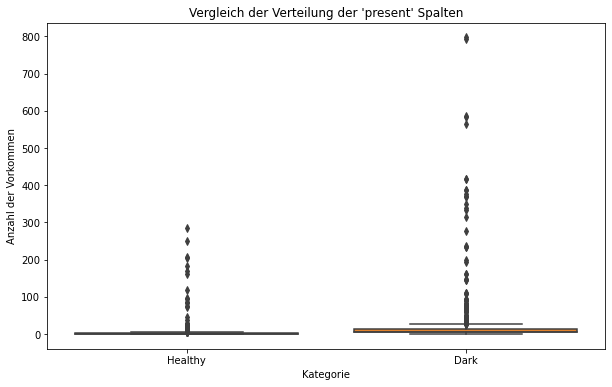

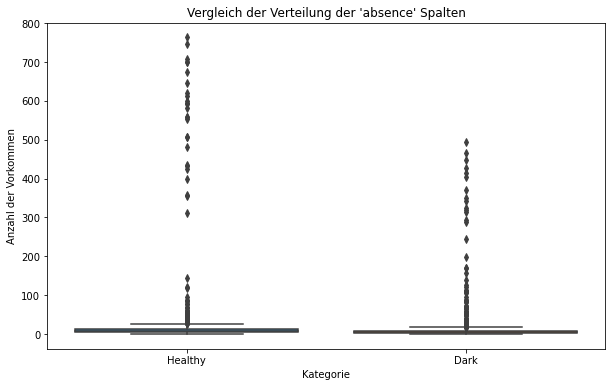

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lade die Datensätze
df_h = pd.read_csv("df_h.csv")
df_d = pd.read_csv("df_d.csv")

# Wähle die relevanten Spalten aus
present_columns = ['Temporal Dark Patterns Present', 'Monetary Dark Patterns Present', 'Social Dark Patterns Present', 'Psychological Dark Patterns Present']
absence_columns = ['Temporal Dark Patterns Absence', 'Monetary Dark Patterns Absence', 'Social Dark Patterns Absence', 'Psychological Dark Patterns Absence']

# Füge eine Spalte für die Kategorie hinzu
df_h['Category'] = 'Healthy'
df_d['Category'] = 'Dark'

# Kombiniere die Datensätze
combined_df = pd.concat([df_h, df_d])

# Mache die Indexierung flach
combined_df = combined_df.reset_index(drop=True)

# Vergleiche die Verteilung der "present" Spalten
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='Category', y=present_columns[0])
plt.title("Vergleich der Verteilung der 'present' Spalten")
plt.xlabel("Kategorie")
plt.ylabel("Anzahl der Vorkommen")
plt.show()

# Vergleiche die Verteilung der "absence" Spalten
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='Category', y=absence_columns[0])
plt.title("Vergleich der Verteilung der 'absence' Spalten")
plt.xlabel("Kategorie")
plt.ylabel("Anzahl der Vorkommen")
plt.show()


In [56]:
from scipy.stats import ttest_ind

patterns = [
    'Temporal', 'Monetary', 'Social', 'Psychological'
]
for pattern in patterns:
    dark_data = dark_df[pattern + ' Dark Patterns Present']
    healthy_data = healthy_df[pattern + ' Dark Patterns Present']
    
    t_stat, p_value = ttest_ind(dark_data, healthy_data)
    print(f"{pattern} - t-statistic: {t_stat}, p-value: {p_value}")

Temporal - t-statistic: 6.0587057060747265, p-value: 1.7337333554233735e-09
Monetary - t-statistic: 6.902085365756499, p-value: 7.549290226196068e-12
Social - t-statistic: 5.728668335693511, p-value: 1.222014432069426e-08
Psychological - t-statistic: 5.518912485251495, p-value: 4.015403353527888e-08


In [57]:
from scipy.stats import ttest_ind

patterns = [
    'Temporal', 'Monetary', 'Social', 'Psychological'
]

for pattern in patterns:
    dark_data = dark_df[pattern + ' Dark Patterns Absence']
    healthy_data = healthy_df[pattern + ' Dark Patterns Absence']
    
    t_stat, p_value = ttest_ind(dark_data, healthy_data)
    print(f"{pattern} - t-statistic: {t_stat}, p-value: {p_value}")

Temporal - t-statistic: -4.1732775219844465, p-value: 3.175576188158215e-05
Monetary - t-statistic: -4.022810786111369, p-value: 6.038281753589354e-05
Social - t-statistic: -3.135201091519671, p-value: 0.001750807801991638
Psychological - t-statistic: -4.451035873847302, p-value: 9.179774101251839e-06
